In [ ]:
!pip3 install -r requirements.txt

# **Import Library**

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# **Load the Dataset**

In [2]:
df = pd.read_csv("dataset/IMDB-Dataset.csv")

print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


# **Preprocess the Text**

In [3]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)

print(df[['review', 'clean_review']].head())

[nltk_data] Downloading package punkt to /home/syahputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/syahputra/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/syahputra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                        clean_review  
0  one reviewers mentioned watching 1 oz episode ...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [4]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})
print(df[['sentiment', 'label']].head())

  sentiment  label
0  positive      1
1  positive      1
2  positive      1
3  negative      0
4  positive      1


# **Vectorize Text**

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)  
X = vectorizer.fit_transform(df['clean_review'])
y = df['label']

# **Split Dataset & Train the Model**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  

(40000, 5000) (10000, 5000)


In [7]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


# **Evaluate the Model**

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8502
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



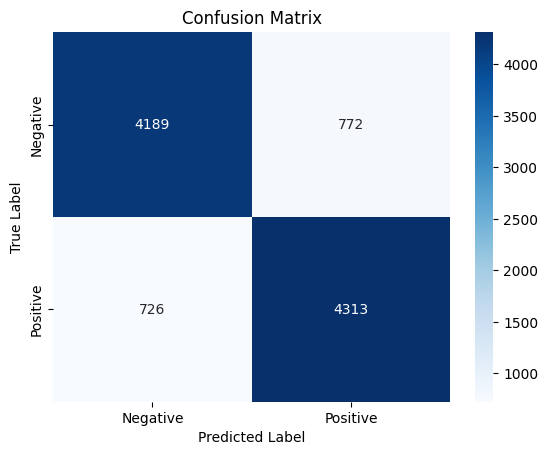

In [9]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **Save the Model and Deploy**

In [10]:
joblib.dump(model, 'models/sentiment_model.pkl')

joblib.dump(vectorizer, 'models/tfidf_vectorizer.pkl')

['models/tfidf_vectorizer.pkl']

In [11]:
loaded_model = joblib.load('models/sentiment_model.pkl')

loaded_vectorizer = joblib.load('models/tfidf_vectorizer.pkl')

new_review = "damn this is the worst movie i have ever seen in my entire life, such a waste of time"
clean_new_review = clean_text(new_review)
X_new = loaded_vectorizer.transform([clean_new_review])
prediction = loaded_model.predict(X_new)

print("Prediction:", "Positive" if prediction[0]==1 else "Negative")

Prediction: Negative
